In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import glob
import imageio
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.metrics import Precision
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#read in files
directories=glob.glob("../data/train/*")
folders=[]
for folder in directories:
    folder=glob.glob(folder+'/*.jpg')
    folders.append(folder)

x=[]
y=[]
for folder in folders:
    rem=len(folder)
    for file in folder:
        image=imageio.imread(file).astype('float32')
        image=(pd.DataFrame(image)/255).values
        image=np.array(image)
        x.append(image)
        if '../data/train/NonDemented' in file:
            y.append(0)
        else:
             y.append(1)

x=np.array(x)
#y=np.asarray(y).astype('float32').reshape((-1,1))
for i in x:
    i=i.reshape(i.shape[0],i.shape[1],1)

y_temp=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(x, y_temp,stratify=y)

In [3]:
from tensorflow.keras.layers import Dropout
model= Sequential()

model.add(Flatten(input_shape=(208,176,1)))
model.add(Dropout(0.10))
model.add(Dense(8000, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(1, activation='sigmoid'))
          
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',Precision()])


In [4]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
history = model.fit(X_train,
                    y_train, 
                    validation_data=(X_test, y_test),
                    epochs=25,
                    callbacks=[early_stop])

Epoch 1/25
120/120 [==============================] - 1622s 13s/step - loss: 9.6201 - accuracy: 0.5885 - precision: 0.5891 - val_loss: 1.4385 - val_accuracy: 0.5464 - val_precision: 1.0000
Epoch 2/25
120/120 [==============================] - 229s 2s/step - loss: 0.9280 - accuracy: 0.6508 - precision: 0.6528 - val_loss: 0.5909 - val_accuracy: 0.7018 - val_precision: 0.6304
Epoch 3/25
120/120 [==============================] - 216s 2s/step - loss: 0.4973 - accuracy: 0.7570 - precision: 0.7524 - val_loss: 0.4197 - val_accuracy: 0.7994 - val_precision: 0.7513
Epoch 4/25
120/120 [==============================] - 216s 2s/step - loss: 0.5079 - accuracy: 0.7456 - precision: 0.7427 - val_loss: 0.6677 - val_accuracy: 0.6448 - val_precision: 0.9947
Epoch 5/25
120/120 [==============================] - 212s 2s/step - loss: 0.4284 - accuracy: 0.7977 - precision: 0.7963 - val_loss: 0.3886 - val_accuracy: 0.8212 - val_precision: 0.8773
Epoch 6/25
120/120 [==============================] - 217s 2s/s

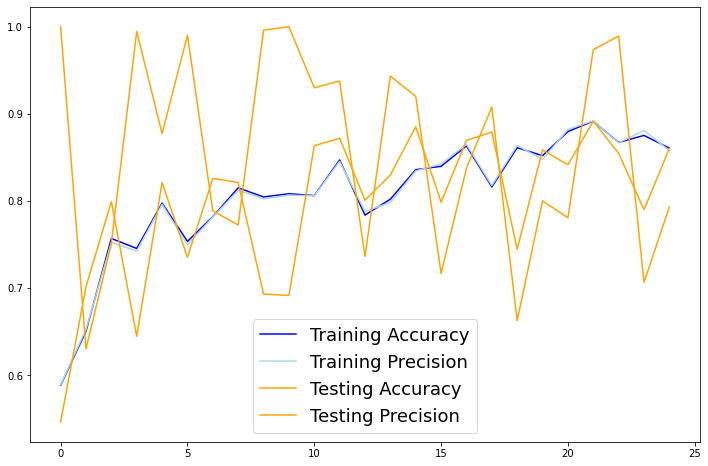

In [5]:
# Check out our train loss and test loss over epochs.
train_acc = history.history['accuracy']
train_pre = history.history[f'precision']
test_acc = history.history[f'val_accuracy']
test_pre = history.history[f'val_precision']

epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(train_pre, label='Training Precision', color='lightblue')
plt.plot(test_acc, label='Testing Accuracy', color='orange')
plt.plot(test_pre, label='Testing Precision', color='orange')
plt.legend(fontsize=18);

In [9]:
from sklearn.metrics import classification_report
pred=[1 if i[0]>=.5 else 0 for i in model.predict(X_test)]
print(classification_report(y_test, pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84       640
           1       0.79      0.98      0.87       641

    accuracy                           0.86      1281
   macro avg       0.88      0.86      0.86      1281
weighted avg       0.88      0.86      0.86      1281

